# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
employees = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/employees.csv', sep=';')
employees.head(10)

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN
3,Sonia,HR,Bachelor,F,analyst,4,35,NaN
4,Samuel,Sales,Master,M,associate,3,55,NaN
5,Eva,Sales,Bachelor,F,associate,2,55,NaN
6,Carlos,IT,Master,M,VP,8,70,NaN
7,Pedro,IT,Phd,M,associate,7,60,NaN
8,Ana,HR,Master,F,VP,8,70,NaN


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1: without pivot tables
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2: with pivot tables
employees.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
employees.pivot_table(index=['Department', 'Title'], values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
employees.pivot_table(index='Title', columns=['Years'], values=['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [12]:
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['describe'])

describe                                               
                          25%   50%    75% count   max  mean   min       std
Department Title                                                            
HR         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP           70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst      31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate    60.00  60.0  60.00   1.0  60.0  60.0  60.0       NaN
Sales      associate    55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

**Answer: The salaries for each title seem to variate little or nothing, inside the Department or between Departments. As we can see, for example, analyst has a salary of 32u in HR, with little variation (30 - 35) and the same in IT. So, all variables seem to behave as normal distribution in the relation with salary, but, in fact, it's because the salaries are the same inside the groups, with a little variation for analyst, as we can see with a small number of stardard deviation (3.5).**

#### Based on your comments, fill the missing values with an appropriate value.

In [13]:
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['describe'], fill_value = 0).reset_index()

Department      Title describe                                           
                             25%   50%    75% count max  mean min       std
0         HR         VP    70.00  70.0  70.00     1  70  70.0  70  0.000000
1         HR    analyst    31.25  32.5  33.75     2  35  32.5  30  3.535534
2         IT         VP    70.00  70.0  70.00     1  70  70.0  70  0.000000
3         IT    analyst    31.25  32.5  33.75     2  35  32.5  30  3.535534
4         IT  associate    60.00  60.0  60.00     1  60  60.0  60  0.000000
5      Sales  associate    55.00  55.0  55.00     2  55  55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [14]:
employees.pivot_table(index=['Department'], values='Salary', aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [17]:
employees.pivot_table(index=['Department', 'Title'], aggfunc={'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [20]:
fitbit = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/Fitbit.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [21]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [22]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [23]:
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [24]:
import matplotlib.pyplot as plt;

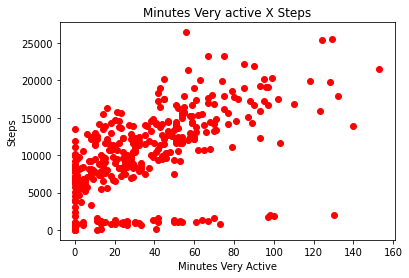

In [26]:
plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps'], color = 'red')
plt.title('Minutes Very active X Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

**Answer: It's a little rare that we have few observations that are very active, but with just few steps. In my opinion, these two variables have medium correlation (0.57), but there must be others important variables that affect and cause these outilers.**

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [27]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

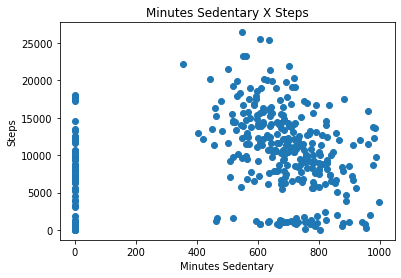

In [28]:
plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit['Steps'])
plt.title('Minutes Sedentary X Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

**Answer: I already expected a graphic like this one, because the correlation is very not significant (0.076). As we can see, observations are scattered in the graphic, so there is not linear relationship.** 

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [29]:
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

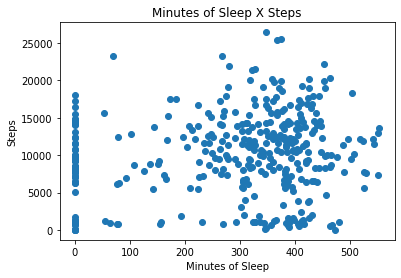

In [32]:
plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps'])
plt.title('Minutes of Sleep X Steps')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

**Answer: The same as the correlation Minutes Sedentary X Steps.**

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [34]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [36]:
cor_fit = fitbit[columns]
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [38]:
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [40]:
cor_fit.corr().sort_values('Steps', ascending=False)


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [42]:
time_grades = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

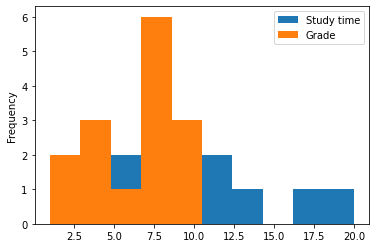

In [45]:
time_grades.plot(kind = 'hist')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [46]:
time_grades[['Study time', 'Grade']].corr(method = 'pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [47]:
time_grades[['Study time', 'Grade']].corr(method = 'spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


**Answer: The correlation between Grade and Study Time is bigger in the method Spearman, mainly because this method use to works with ordinal variables. "In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. Spearman's correlation coefficient is based on the classified values of each variable, rather than the raw data".**

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

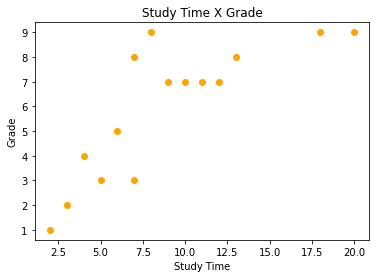

In [51]:
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'], color = 'orange')
plt.title('Study Time X Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

**Answer: We have a significant correlation between both variables, as we could see above (Pearson=0.79, Spearman=0.81), but for this graph I would not say that this is the correlation, because the observations are not to concentrated if we draw a line.**

#### Could you explain the difference between Pearson and Spearman correlations?

**Answer: Person - linear relationship, interval scale. Spearman: monotonic relationship, ordinal scale, where the variables tend to change together, but not necessarily at a constant rate, based on the classified values of each variable, rather than the raw data.**